# Heart Failure Research ML Model Comparison

In this notebook we will be analyzing some data and comparing various ML models in which I do a moderate amount of turning and adjustment. The models we will be trying are (1) dense connected neural networks, (2) Random Forests, (3) and XGBoost. XGBoost is perhaps the most conceptually complex of these algorithms as it pulls together many different types of models and techniques from bagging to gradient boosting. Here are some good links for learning about XGBoost: [link1](https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/) and [link2](https://www.analyticsvidhya.com/blog/2018/09/an-end-to-end-guide-to-understand-the-math-behind-xgboost/).

### Read in the data

In [284]:
import pandas as pd
# https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-6fcd0170be9c
csv_path = "../data/chf_data.csv"
data = pd.read_csv(csv_path, header=1) 
data

,Patient Identifier,Admission Date,Age,Gender,BMI,Zip Code,Echocardiogram LVEF (%),Troponin (highest),Hemoglobin A1C,Creat (Chem 7 within 24 hours of admission),...,30 day death,60 day death,90 day death,DM,Hypertension,Coronary Artery Disease,Prior Stroke / TIA / Cerebral Vascular Ischemia,Atrial Fibrillation,Peripheral vascular disease,Obstructive Sleep Apnea
0,8-18 D,6/12/2018,71,F,22.13,93703,25.0,2.04,NaN,1.90,...,No,No,No,No,Yes,Yes,No,No,Yes,No
1,4-18 B,4/7/2018,58,M,31.13,94565,49.0,0.44,NaN,2.17,...,No,No,No,No,Yes,Yes,No,Yes,No,No
2,6-18 E,6/6/2018,68,F,20.87,95116,NaN,0.03,NaN,0.63,...,No,No,No,No,Yes,No,No,No,No,No
3,8-18 G,5/26/2018,60,M,46.16,95205,NaN,0.04,NaN,1.06,...,No,No,No,No,Yes,No,No,No,No,No
4,4-18 E,6/18/2018,83,M,30.51,95220,NaN,NaN,NaN,2.36,...,No,No,No,Yes,Yes,Yes,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9-18 S,5/18/2018,72,F,34.40,95838,NaN,0.02,NaN,1.33,...,No,No,No,Yes,No,No,Yes,Yes,No,No
96,9-18 W,9/5/2018,56,F,25.79,96003,20.0,0.03,NaN,NaN,...,No,No,No,Yes,Yes,No,No,No,No,No
97,6-18 H,5/3/2018,75,F,42.38,Homeless,72.0,0.02,NaN,0.70,...,No,No,No,Yes,No,No,No,No,No,Yes
98,8-18 A,4/19/2018,44,M,24.68,Homeless,23.0,0.12,NaN,1.30,...,No,No,No,Yes,Yes,No,No,No,No,No


In [60]:
# get the data from patient three
data.loc(0)[3]

Patient Identifier                                    8-18 G
Admission Date                                     5/26/2018
Age                                                       60
Gender                                                     M
BMI                                                    46.16
Zip Code                                               95205
Echocardiogram LVEF (%)                                  NaN
Troponin (highest)                                      0.04
Hemoglobin A1C                                           NaN
Creat (Chem 7 within 24 hours of admission)             1.06
GFR                                                      NaN
BNP (Initial, B-type naturetic peptide)                  131
Urine Tox Screen                                         NaN
Smoking (Yes/ No/ Former)                             Former
Smoking (Pack Year History)                               40
Marijuana                                                Yes
Alcohol (low/high)      

In [61]:
# Find all the data samples were the Gender is Male
data.loc[data['Gender'] == 'M'].head(6) # only print out first 6

,Patient Identifier,Admission Date,Age,Gender,BMI,Zip Code,Echocardiogram LVEF (%),Troponin (highest),Hemoglobin A1C,Creat (Chem 7 within 24 hours of admission),...,30 day death,60 day death,90 day death,DM,Hypertension,Coronary Artery Disease,Prior Stroke / TIA / Cerebral Vascular Ischemia,Atrial Fibrillation,Peripheral vascular disease,Obstructive Sleep Apnea
1,4-18 B,4/7/2018,58,M,31.13,94565,49.0,0.44,NaN,2.17,...,No,No,No,No,Yes,Yes,No,Yes,No,No
3,8-18 G,5/26/2018,60,M,46.16,95205,NaN,0.04,NaN,1.06,...,No,No,No,No,Yes,No,No,No,No,No
4,4-18 E,6/18/2018,83,M,30.51,95220,NaN,NaN,NaN,2.36,...,No,No,No,Yes,Yes,Yes,No,No,No,Yes
5,8-18 I,6/9/2018,90,M,39.00,95221,NaN,0.04,NaN,1.00,...,No,No,No,No,Yes,No,No,Yes,No,No
6,9-18 D,4/22/2018,85,M,31.50,95240,60.0,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No
7,9-18 H,4/11/2018,66,M,24.41,95605,50.0,7.09,6.4,4.43,...,No,No,No,Yes,No,No,No,No,No,No


### Do some basic data analysis

Lets look for any potential sources of bias that might reduce the generalizability of our results. We can also check which data sources may not be reliable to use due to sparse information. Note that some machine learning algorithms are not bothered all that much by missing data such as random forests and XGBoost, however ML models such as neural networks require all the data points to be provided in order to get a result which means that if some data is missing either you ommit the data from the patients who are missing the necessary data points or you ommit the data that the missing points belong to from the whole algorithm. 

Graph options can be found here https://seaborn.pydata.org/examples/index.html

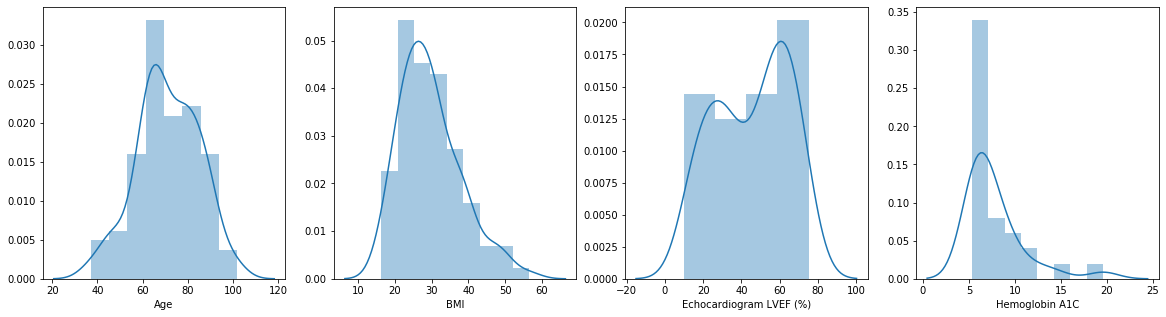

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(20,5))
fig.add_subplot(1,4,1)
sns.distplot(data['Age'])
fig.add_subplot(1,4,2)
sns.distplot(data['BMI'])
fig.add_subplot(1,4,3)
sns.distplot(data['Echocardiogram LVEF (%)'])
fig.add_subplot(1,4,4)
sns.distplot(data['Hemoglobin A1C'])

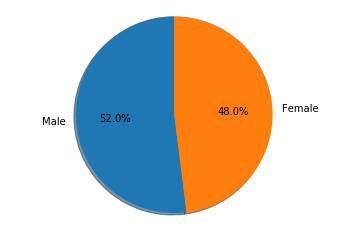

In [63]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Male', 'Female'
sizes = [data.loc[data['Gender'] == 'M'].shape[0], data.loc[data['Gender'] == 'F'].shape[0]]
explode = (0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

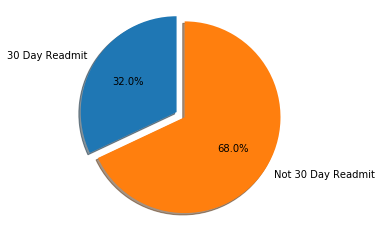

In [64]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = '30 Day Readmit', 'Not 30 Day Readmit'
sizes = [data.loc[data['30 day readmission'] == 'Yes'].shape[0], data.loc[data['30 day readmission'] == 'No'].shape[0]]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

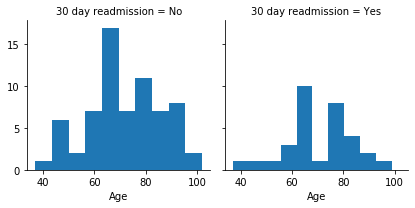

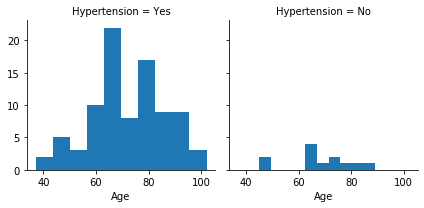

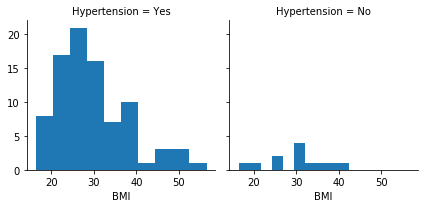

In [65]:
g = sns.FacetGrid(data, col="30 day readmission")
g.map(plt.hist, "Age");

g = sns.FacetGrid(data, col="Hypertension")
g.map(plt.hist, "Age");

g = sns.FacetGrid(data, col="Hypertension")
g.map(plt.hist, "BMI");

In [66]:
import folium



# https://towardsdatascience.com/visualizing-data-at-the-zip-code-level-with-folium-d07ac983db20

#m = folium.Map(location=[38.5816, -121.4944])
#m

## ML Time

### Neural Network

Lets start with a simpled deep neural network using techniques such as dropout. The data we will be using to make the 30 day readmit prediction are age, gender, BMI, Troponin,  Creat (Chem 7 within 24 hours of admission), BNP (Initial, B-type naturetic peptide), and Coronary Artery Disease (7 categories)

In [67]:
import tensorflow as tf
print(tf.__version__)
tf.config.experimental.list_physical_devices('GPU')

2.1.0


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Clean up the data so that we remove all the datapoints that have NaNs in any of the categories that we care about. This must be done with a neural network model.

In [68]:
nn_df = data[["Age", "Gender", "BMI", "Troponin (highest)", "Creat (Chem 7 within 24 hours of admission)", "BNP (Initial, B-type naturetic peptide)", "Coronary Artery Disease", "30 day readmission"]]
nn_df

,Age,Gender,BMI,Troponin (highest),Creat (Chem 7 within 24 hours of admission),"BNP (Initial, B-type naturetic peptide)",Coronary Artery Disease,30 day readmission
0,71,F,22.13,2.04,1.90,640.0,Yes,No
1,58,M,31.13,0.44,2.17,180.0,Yes,Yes
2,68,F,20.87,0.03,0.63,641.0,No,No
3,60,M,46.16,0.04,1.06,131.0,No,No
4,83,M,30.51,NaN,2.36,908.0,Yes,Yes
...,...,...,...,...,...,...,...,...
95,72,F,34.40,0.02,1.33,1295.0,No,No
96,56,F,25.79,0.03,NaN,3876.0,No,No
97,75,F,42.38,0.02,0.70,116.0,No,Yes
98,44,M,24.68,0.12,1.30,2987.0,No,No


In [69]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
nn_df = nn_df.dropna() # remove all the inavalid / NaN data
nn_df

,Age,Gender,BMI,Troponin (highest),Creat (Chem 7 within 24 hours of admission),"BNP (Initial, B-type naturetic peptide)",Coronary Artery Disease,30 day readmission
0,71,F,22.13,2.04,1.90,640.0,Yes,No
1,58,M,31.13,0.44,2.17,180.0,Yes,Yes
2,68,F,20.87,0.03,0.63,641.0,No,No
3,60,M,46.16,0.04,1.06,131.0,No,No
8,77,M,23.63,0.09,3.16,4500.0,No,No
...,...,...,...,...,...,...,...,...
94,82,F,28.68,0.04,1.20,633.0,No,No
95,72,F,34.40,0.02,1.33,1295.0,No,No
97,75,F,42.38,0.02,0.70,116.0,No,Yes
98,44,M,24.68,0.12,1.30,2987.0,No,No


In [70]:
nn_numpy = nn_df.to_numpy()
nn_numpy

array([[71, 'F', 22.13, 2.04, 1.9, 640.0, 'Yes', 'No'],
       [58, 'M', 31.13, 0.44, 2.17, 180.0, 'Yes', 'Yes'],
       [68, 'F', 20.87, 0.03, 0.63, 641.0, 'No', 'No'],
       [60, 'M', 46.16, 0.04, 1.06, 131.0, 'No', 'No'],
       [77, 'M', 23.63, 0.09, 3.16, 4500.0, 'No', 'No'],
       [77, 'F', 16.65, 0.46, 4.71, 2520.0, 'Yes', 'Yes'],
       [77, 'F', 16.31, 0.02, 1.93, 601.0, 'No', 'Yes'],
       [76, 'F', 16.31, 0.02, 1.46, 1134.0, 'No', 'Yes'],
       [67, 'F', 50.74, 0.04, 1.45, 140.0, 'Yes', 'Yes'],
       [89, 'M', 26.93, 0.06, 4.33, 640.0, 'Yes', 'Yes'],
       [61, 'F', 30.57, 0.17, 1.8, 1552.0, 'Yes', 'Yes'],
       [70, 'F', 39.24, 0.07, 8.87, 2280.0, 'No', 'No'],
       [99, 'F', 24.72, 0.02, 0.89, 372.0, 'No', 'No'],
       [90, 'F', 21.14, 0.31, 0.88, 563.0, 'Yes', 'No'],
       [82, 'F', 31.02, 0.03, 1.09, 1331.0, 'Yes', 'Yes'],
       [82, 'M', 20.33, 0.09, 6.55, 1121.0, 'No', 'No'],
       [90, 'F', 30.71, 1.63, 1.72, 2159.0, 'No', 'No'],
       [84, 'M', 37.31, 0.

In [71]:
# Normalize data and convert to neural net friendly format
for row in nn_numpy:
    # convert gender to zero or 1
    if row[1] == "F":
        row[1] = 0.0
    else:
        row[1] = 1.0
        
    if row[6] == "Yes":
        row[6] = 0.0
    else:
        row[6] = 1.0
        
    if row[7] == "Yes":
        row[7] = 0.0
    else:
        row[7] = 1.0

In [72]:
mean = nn_numpy.sum(axis=0)/nn_numpy.shape[0]
print(mean)

[70.9875 0.4875 29.68875 0.13249999999999984 2.127375 1168.6875 0.65 0.675]


In [98]:
variance = np.absolute((nn_numpy - mean)).sum(axis=0)/nn_numpy.shape[0]
print(variance)

[10.686875000000002 0.49968749999999973 6.748468749999995
 0.14118749999999997 1.2433125000000003 810.6109375 0.4550000000000004
 0.43875000000000003]


In [86]:
range_min = nn_numpy.min(axis=0)
print(range_min)

[37 0.0 16.31 0.02 0.54 64.0 0.0 0.0]


In [87]:
range_max = nn_numpy.max(axis=0)
print(range_max)

[102 1.0 50.74 2.04 9.47 4500.0 1.0 1.0]


In [104]:
# make all the data go from zero to one
# the range varibales will need ot be stored in order to validate other data sinec normalization will need to be run on it as well. 
# performance is not gauranteed for data outside the range of the set since normalization will be incorrect (you may get numbers less than zero or greater than 1).
normalized_nn_data = (nn_numpy - range_min)/(range_max-range_min)
print(normalized_nn_data[0])

[0.5230769230769231 0.0 0.16903862910252684 1.0 0.1522956326987682
 0.12984670874661858 0.0 1.0]


In [155]:
# split the data so that x and y are seoaret arrays
np.random.shuffle(normalized_nn_data)
x  = normalized_nn_data[:, :normalized_nn_data.shape[1]-2].astype(np.float32)
y  = normalized_nn_data[:, normalized_nn_data.shape[1]-1].astype(np.float32)

print(x.shape)
print(y.shape)

(80, 6)
(80,)


#### Building the Neural Networks

We will use deep connected layers with dropout

In [267]:
nn_model = tf.keras.Sequential([
    tf.keras.Input(6),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Activation('sigmoid') # this will bind the output from 0 to 1
])
nn_model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01), loss='binary_crossentropy', metrics = ['acc'])
nn_model.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_176 (Dense)            (None, 50)                350       
_________________________________________________________________
dropout_148 (Dropout)        (None, 50)                0         
_________________________________________________________________
activation_173 (Activation)  (None, 50)                0         
_________________________________________________________________
dense_177 (Dense)            (None, 50)                2550      
_________________________________________________________________
dropout_149 (Dropout)        (None, 50)                0         
_________________________________________________________________
activation_174 (Activation)  (None, 50)                0         
_________________________________________________________________
dense_178 (Dense)            (None, 50)              

In [268]:
history = nn_model.fit(x, y, epochs=300, validation_split=0.5)

Train on 40 samples, validate on 40 samples
Epoch 1/300
40/40 [==============================] - 0s 8ms/sample - loss: 0.7142 - acc: 0.4250 - val_loss: 0.6924 - val_acc: 0.6500
Epoch 2/300
40/40 [==============================] - 0s 219us/sample - loss: 0.6812 - acc: 0.5750 - val_loss: 0.6911 - val_acc: 0.6750
Epoch 3/300
40/40 [==============================] - 0s 203us/sample - loss: 0.7004 - acc: 0.4500 - val_loss: 0.6903 - val_acc: 0.6750
Epoch 4/300
40/40 [==============================] - 0s 208us/sample - loss: 0.6991 - acc: 0.5000 - val_loss: 0.6893 - val_acc: 0.6500
Epoch 5/300
40/40 [==============================] - 0s 201us/sample - loss: 0.6851 - acc: 0.6000 - val_loss: 0.6881 - val_acc: 0.7250
Epoch 6/300
40/40 [==============================] - 0s 210us/sample - loss: 0.7061 - acc: 0.3750 - val_loss: 0.6869 - val_acc: 0.7250
Epoch 7/300
40/40 [==============================] - 0s 204us/sample - loss: 0.6898 - acc: 0.5000 - val_loss: 0.6861 - val_acc: 0.7000
Epoch 8/300
4

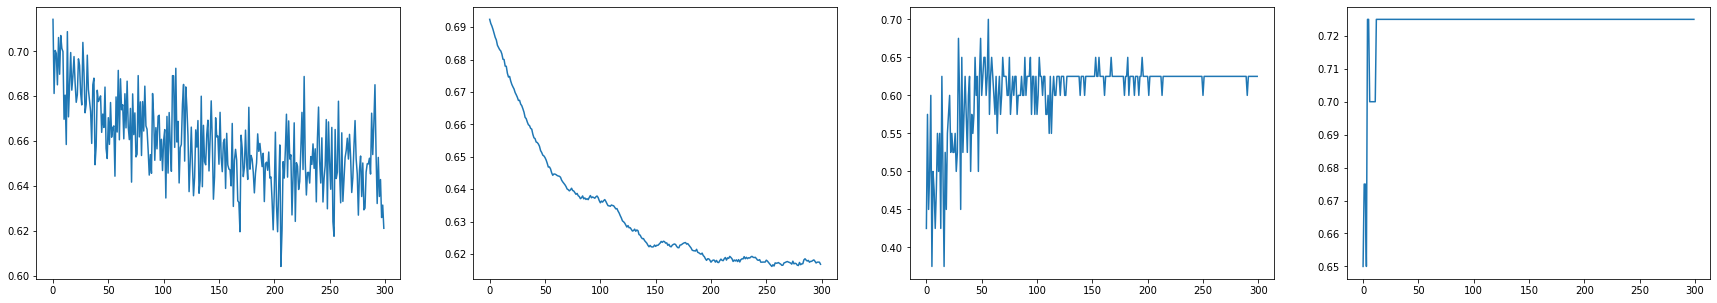

In [269]:
fig = plt.figure(figsize=(30,5))
fig.add_subplot(1,4,1)
plt.plot(history.history['loss'])
fig.add_subplot(1,4,2)
plt.plot(history.history['val_loss'])
fig.add_subplot(1,4,3)
plt.plot(history.history['acc'])
fig.add_subplot(1,4,4)
plt.plot(history.history['val_acc'])

### XGBoost

https://xgboost.readthedocs.io/en/latest/tutorials/model.html

Now lets try out a simple XGBoost algorithm. The data we will be the same as the neural network: the 30 day readmit prediction are age, gender, BMI, Troponin,  Creat (Chem 7 within 24 hours of admission), BNP (Initial, B-type naturetic peptide), and Coronary Artery Disease (7 categories). This time XGBoost automatically handles missing data nad is less varient to it so we wont need to deal with that. 

In [404]:
import xgboost as xgb
import itertools

xgb_unsplit_data = data[["Age", "Gender", "BMI", "Troponin (highest)", "Creat (Chem 7 within 24 hours of admission)", "BNP (Initial, B-type naturetic peptide)", "Coronary Artery Disease", "30 day readmission"]].to_numpy()
# xgb_label = data[["30 day readmission"]].to_numpy()

np.random.shuffle(xgb_unsplit_data)

for row in xgb_unsplit_data:
    # convert gender to zero or 1
    if row[1] == "F":
        row[1] = False
    else:
        row[1] = True
        
    if row[6] == "Yes":
        row[6] = False
    else:
        row[6] = True
    if row[7] == "Yes":
        row[7] = False
    else:
        row[7] = True

validation_split = 0.2
xgb_test = xgb_unsplit_data[:int(xgb_unsplit_data.shape[0]*validation_split)]
xgb_train = xgb_unsplit_data[int(xgb_unsplit_data.shape[0]*validation_split):]

dtrain = xgb.DMatrix(xgb_train[:,:6], label=xgb_train[:,7])
dtest = xgb.DMatrix(xgb_test[:,:6], label=xgb_test[:,7])

[0.506 0.406 0.952 0.316 0.339 0.981 0.53  0.755 0.832 0.98  0.102 0.929
 0.951 0.133 0.976 0.345 0.922 0.927 0.116 0.977]


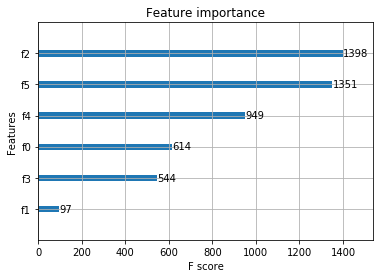

In [444]:
# https://xgboost.readthedocs.io/en/latest/parameter.html
# eta ~ learning rate
# max depth is the number of levels that a tree will have
param = {'max_depth':10, 'eta':0.01, 'objective':'binary:logistic'}
num_round = 750 # number of trees that will be created

# Read: https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/ for tutorial on tuning parameters

bst = xgb.train(param, dtrain, num_round)
# make prediction
xgb_predictions = bst.predict(dtest)
print(xgb_predictions)
xgb.plot_importance(bst)

#   0       1        2             3                                      4                                        5                                    6
# "Age", "Gender", "BMI", "Troponin (highest)", "Creat (Chem 7 within 24 hours of admission)", "BNP (Initial, B-type naturetic peptide)", "Coronary Artery Disease"

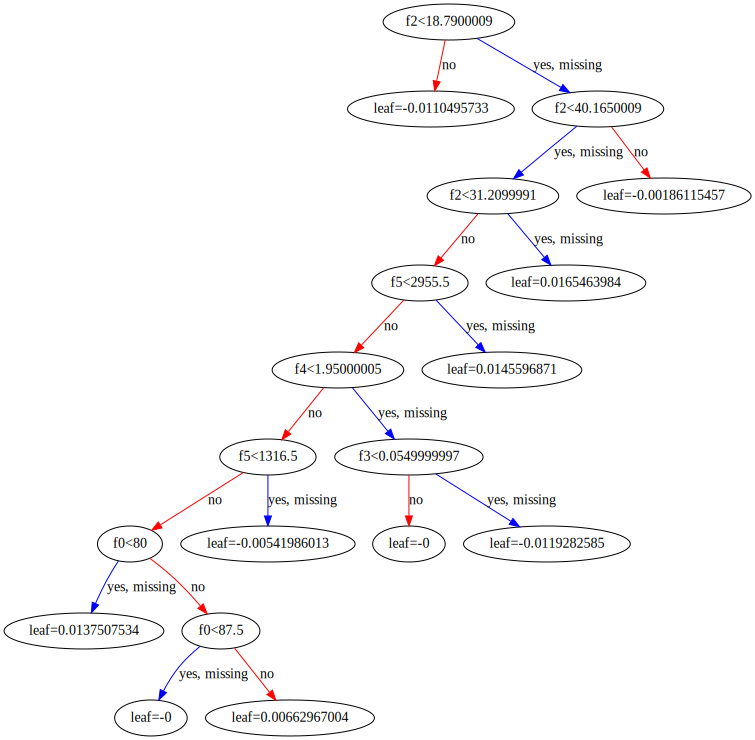

In [445]:
xgb.to_graphviz(bst, num_trees=1)

In [446]:
correct = 0
for prediction, answer in zip(xgb_predictions, xgb_test[:,7]):
    pred_bool = (prediction > 0.5)
    if pred_bool == answer:
        correct += 1

xgb_accuracy = correct/float(xgb_test[:,7].shape[0])
print(xgb_accuracy)

0.65
